In [1]:
import spacedecomp
from spacedecomp import Factorization
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
training_data = datasets.MNIST(
    root="../datasets/",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
training_dataloader = DataLoader(training_data, batch_size=4096)

In [3]:
x_train, y_train = next(iter(training_dataloader))

In [4]:
Y = (x_train).reshape(x_train.shape[0], -1)
Y = Y-(Y.mean(axis=0))

In [5]:
model = Factorization(Y.detach().numpy(), laten_dim=10, train_loadings=True, type='FA', use_svd=True)

In [6]:
history = model.train(Y, lr=2e-4, epochs=500)

  0%|          | 0/500 [00:00<?, ?it/s]

Finished training


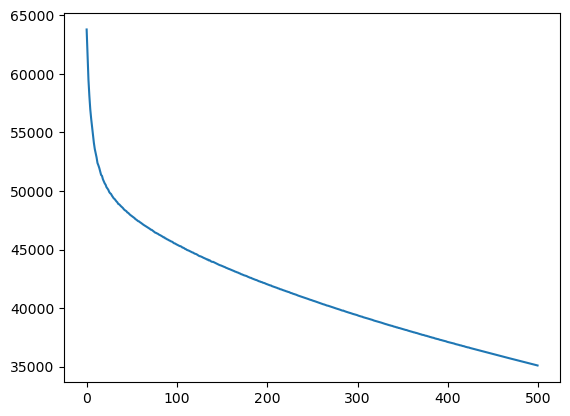

In [7]:
plt.plot(history)

In [8]:
F = model.q_f.sample()

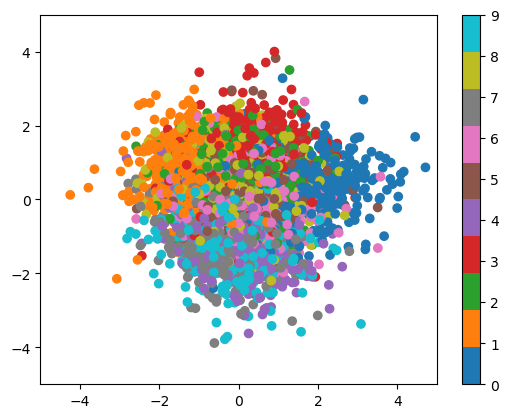

In [9]:
plt.scatter(F[:, 0], F[:, 1], c=y_train, cmap='tab10')
plt.ylim([-5, 5])
plt.xlim([-5, 5])
plt.colorbar()

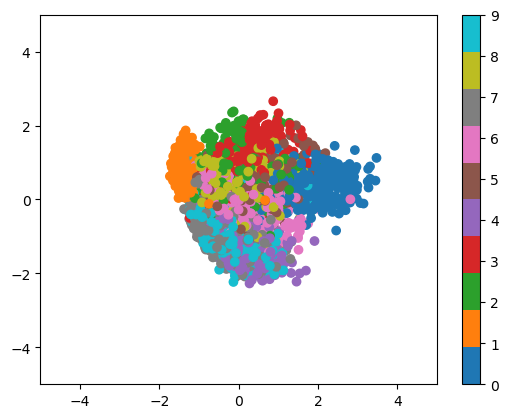

In [10]:
plt.scatter(model.f_qmean[:, 0].detach().cpu(), model.f_qmean[:, 1].detach().cpu(), c=y_train, cmap='tab10')
plt.ylim([-5, 5])
plt.xlim([-5, 5])
plt.colorbar()

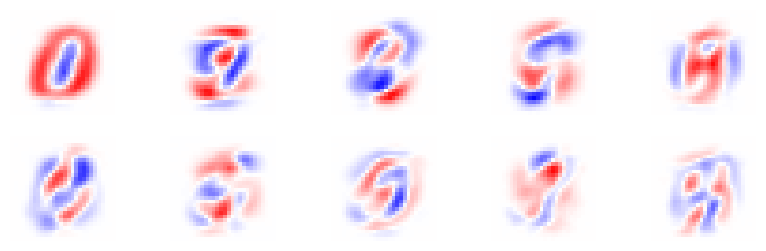

In [12]:
plt.figure(figsize=(10, 3))
for i in range(model.L):
    plt.subplot(2, 5, i+1)
    loading = model.W[:, i].detach().cpu().numpy()
    plt.imshow(loading.reshape(28, 28), vmin=-0.2, vmax=0.2, cmap='bwr')
    plt.axis('off')